In [1]:
!pip install tensorflow matplotlib seaborn pandas numpy pillow scikit-learn opencv-python

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.keras.datasets import fashion_mnist
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import pandas as pd
import os

dataset = '/dataset'
current_path = os.getcwd()
dataset_path = current_path + dataset

images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)

df = pd.DataFrame({'image': images, 'label': labels})

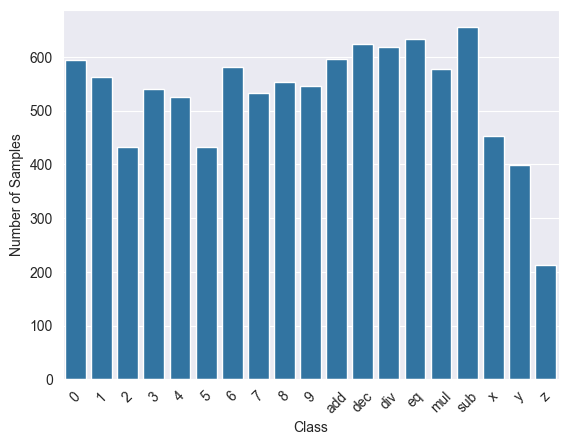

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the classes
ax = sns.countplot(x=df.label)
ax.set_xlabel("Class")
ax.set_ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

In [4]:
import pathlib

data_dir = pathlib.Path(dataset_path)

[WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/01Uh1FIe.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/0dJ2YQOQ.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/0GaQrphn.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/163eif9X.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/1CJz33wp.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/1edWfiAX.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/1PXcRCgb.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/1WSoM1si.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/222GpLoB.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/2K7diJ1B.png'), WindowsPath('C:/Ariel codes/DL and NLP/assignment3/final_report/dataset/z/2KgYHn7L.png'), WindowsPa

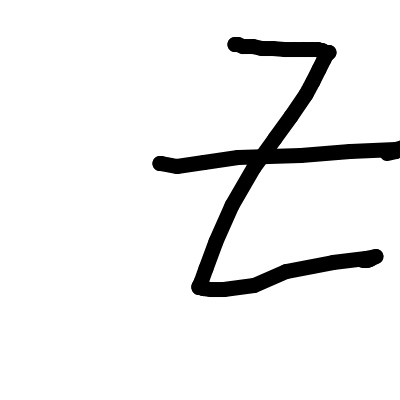

In [5]:
import PIL

digits = list(data_dir.glob('z/*'))
print(digits)
PIL.Image.open(str(digits[0]))

In [6]:
image_count = len(list(data_dir.glob('*/*.*')))
print("Total no of images =",image_count)

Total no of images = 10071


In [7]:
img_height = 32
img_width = 32
num_classes = len(np.unique(labels))

In [8]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(labels)

class_indices = {class_name: index for index, class_name in enumerate(label_encoder.classes_)}

def image_generator(image_paths, labels, batch_size):
    while True:
        batch_paths = np.random.choice(a=len(image_paths), size=batch_size)
        batch_input = []
        batch_output = []

        for index in batch_paths:
            input = cv2.imread(image_paths[index], cv2.IMREAD_GRAYSCALE)

            if input is None:
                print(f"Image not loaded correctly: {image_paths[index]}")
                continue
            
            input = cv2.resize(input, (img_height, img_width))  
            # input = input / 255.0  
            output = labels[index]

            output = to_categorical(output, num_classes=len(np.unique(labels)))

            batch_input += [input]
            batch_output += [output]
        
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output)

        yield (batch_x, batch_y)

In [9]:
batch_size = 1
generator = image_generator(images, integer_encoded_labels, batch_size)

In [10]:
X = []
y = []

for i in range(len(images)):  # Use len(images) instead of len(generator)
    img, label = next(generator)
    X.append(img)
    y.append(label.argmax())
    if(i%1000 == 0):
        print(i)

X = np.array(X)
y = np.array(y)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[2], X_train.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[2], X_test.shape[3]))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[2], X_val.shape[3]))

In [12]:
# Print the shapes of the extracted data and target values.
print("X_train shape:", X_train.shape)  # Shape of the training data.
print("X_test shape:", X_test.shape)    # Shape of the testing data.
print("X_val shape:", X_val.shape)    # Shape of the validation data.
print("y_train shape:", y_train.shape)  # Shape of the training targets.
print("y_test shape:", y_test.shape)    # Shape of the testing targets.
print("y_val shape:", y_val.shape)    # Shape of the validation targets.

img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train shape: (8056, 32, 32)
X_test shape: (1008, 32, 32)
X_val shape: (1007, 32, 32)
y_train shape: (8056,)
y_test shape: (1008,)
y_val shape: (1007,)


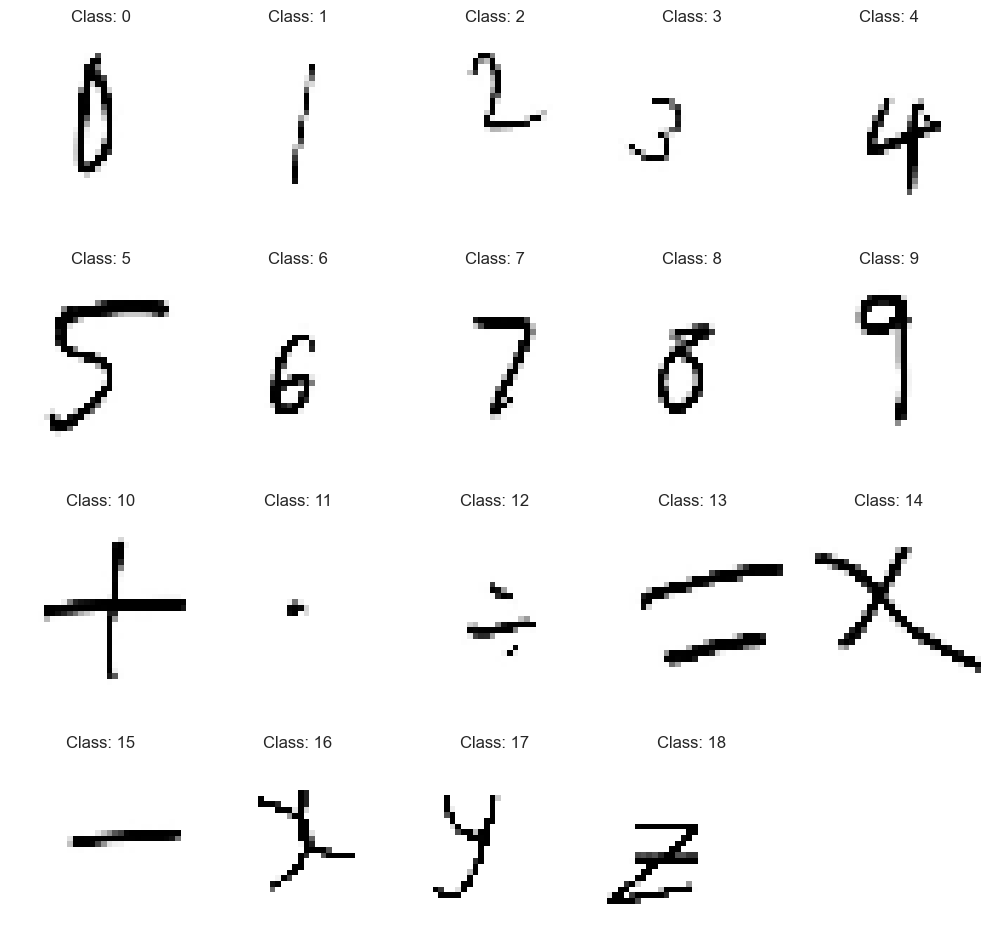

In [13]:
import matplotlib.pyplot as plt

# Get unique classes
unique_classes = np.unique(y_train)

# Create a figure for plotting
fig = plt.figure(figsize=(10, 10))

# Iterate over unique classes
for i, class_name in enumerate(unique_classes):
    # Find the first image of this class
    image = X_train[y_train == class_name][0]

    # Plot the image
    ax = fig.add_subplot(4, 5, i+1)  # Adjust subplot parameters based on number of unique classes
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Class: {class_name}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# Softmax Regression

In [84]:
lr_alpha = 0.01
LR_EPOCHS = 1000

features = X_train.shape[1] * X_train.shape[2]

# Define placeholders, model, loss, optimizer, etc. here
X = tf.placeholder(tf.float32, [None, features])
Y = tf.placeholder(tf.int64, [None])  # Correct shape for labels

W = tf.Variable(tf.zeros([features, num_classes]))  # We have 19 classes
b = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(X, W) + b
Y_pred = tf.nn.softmax(logits)  # Softmax activation

# Cross entropy loss
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=Y))

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr_alpha).minimize(loss)

init = tf.global_variables_initializer()

### regular

In [85]:
# Flatten the images
X_train_flat = X_train.reshape(-1, features)
X_test_flat = X_test.reshape(-1, features)
X_val_flat = X_val.reshape(-1, features)

In [86]:
# Print the shapes of the extracted data and target values.
print("X_train shape:", X_train_flat.shape)  # Shape of the training data.
print("X_test shape:", X_test_flat.shape)    # Shape of the testing data.
print("X_val shape:", X_val_flat.shape)    # Shape of the validation data.
print("y_train shape:", y_train.shape)  # Shape of the training targets.
print("y_test shape:", y_test.shape)    # Shape of the testing targets.
print("y_val shape:", y_val.shape)    # Shape of the validation targets.

X_train shape: (8056, 1024)
X_test shape: (1008, 1024)
X_val shape: (1007, 1024)
y_train shape: (8056,)
y_test shape: (1008,)
y_val shape: (1007,)


In [87]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(LR_EPOCHS):
        _, c = sess.run([optimizer, loss], feed_dict={X: X_train_flat, Y: y_train})

        if (epoch+1) % 100 == 0:
            print('Epoch:', '%04d' % (epoch+1), 'loss=', '{:.9f}'.format(c))
            _, val_loss = sess.run([optimizer, loss], feed_dict={X: X_val_flat, Y: y_val})
            print('Validation loss:', val_loss)

    correct_prediction_lr = tf.equal(tf.argmax(Y_pred, 1), Y)
    accuracy_lr = tf.reduce_mean(tf.cast(correct_prediction_lr, tf.float32))
    accuracy = sess.run(accuracy_lr, feed_dict={X: X_test_flat, Y: y_test})
    print('Accuracy:', accuracy)

Epoch: 0100 loss= 211316.015625000
Validation loss: 225137.19
Epoch: 0200 loss= 135716.671875000
Validation loss: 157052.67
Epoch: 0300 loss= 108593.968750000
Validation loss: 100510.445
Epoch: 0400 loss= 61872.906250000
Validation loss: 72052.74
Epoch: 0500 loss= 72539.343750000
Validation loss: 78357.94
Epoch: 0600 loss= 51575.156250000
Validation loss: 50665.625
Epoch: 0700 loss= 45823.652343750
Validation loss: 53438.793
Epoch: 0800 loss= 43875.300781250
Validation loss: 54112.934
Epoch: 0900 loss= 49379.289062500
Validation loss: 48785.45
Epoch: 1000 loss= 39892.742187500
Validation loss: 49334.105
Accuracy: 0.20535715


### normalized

In [88]:
# Normalize the pixel values
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0

# Flatten the images
X_train_normalized_flat = X_train_normalized.reshape(-1, features)
X_test_normalized_flat = X_test_normalized.reshape(-1, features)
X_val_normalized_flat = X_val_normalized.reshape(-1, features)

In [89]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(LR_EPOCHS):
        _, c = sess.run([optimizer, loss], feed_dict={X: X_train_normalized_flat, Y: y_train})

        if (epoch+1) % 100 == 0:
            print('Epoch:', '%04d' % (epoch+1), 'loss=', '{:.9f}'.format(c))
            _, val_loss = sess.run([optimizer, loss], feed_dict={X: X_val_normalized_flat, Y: y_val})
            print('Validation loss:', val_loss)

    correct_prediction_lr = tf.equal(tf.argmax(Y_pred, 1), Y)
    accuracy_lr = tf.reduce_mean(tf.cast(correct_prediction_lr, tf.float32))
    accuracy = sess.run(accuracy_lr, feed_dict={X: X_test_normalized_flat, Y: y_test})
    print('Accuracy:', accuracy)

Epoch: 0100 loss= 2.805135250
Validation loss: 2.8278482
Epoch: 0200 loss= 2.702074766
Validation loss: 2.7336
Epoch: 0300 loss= 2.612071276
Validation loss: 2.6515863
Epoch: 0400 loss= 2.533809662
Validation loss: 2.5805132
Epoch: 0500 loss= 2.465800762
Validation loss: 2.518945
Epoch: 0600 loss= 2.406520128
Validation loss: 2.4654448
Epoch: 0700 loss= 2.354555607
Validation loss: 2.4186985
Epoch: 0800 loss= 2.308684826
Validation loss: 2.3775756
Epoch: 0900 loss= 2.267892361
Validation loss: 2.3411446
Epoch: 1000 loss= 2.231353760
Validation loss: 2.308647
Accuracy: 0.4047619


# Neural Network

In [90]:
epochs = 1000
learning_rate = 0.001

# Define the neural network architecture
def build_neural_network_2_layers(features, hidden_units):
    X = tf.placeholder(tf.float32, [None, features])
    Y = tf.placeholder(tf.int64, [None])  # Correct shape for labels

    # Neural network architecture
    layer_1 = hidden_units[0]
    layer_2 = hidden_units[1]

    # Layer 1
    W1 = tf.Variable(tf.truncated_normal([features, layer_1], stddev=0.1))
    b1 = tf.Variable(tf.constant(0.1, shape=[layer_1]))
    z1 = tf.add(tf.matmul(X, W1), b1)
    a1 = tf.nn.relu(z1)

    # Layer 2
    W2 = tf.Variable(tf.truncated_normal([layer_1, layer_2], stddev=0.1))
    b2 = tf.Variable(tf.constant(0.1, shape=[layer_2]))
    z2 = tf.add(tf.matmul(a1, W2), b2)
    a2 = tf.nn.relu(z2)

    # Output layer
    W3 = tf.Variable(tf.truncated_normal([layer_2, num_classes], stddev=0.1))
    b3 = tf.Variable(tf.constant(0.1, shape=[num_classes]))
    logits = tf.add(tf.matmul(a2, W3), b3)

    # Loss function
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=Y))

    # Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    # Accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return X, Y, optimizer, loss, accuracy


In [91]:
def build_neural_network_3_layers(features, hidden_units):
    X = tf.placeholder(tf.float32, [None, features])
    Y = tf.placeholder(tf.int64, [None])  # Correct shape for labels

    # Neural network architecture
    layer_1 = hidden_units[0]
    layer_2 = hidden_units[1]
    layer_3 = hidden_units[2]

    # Layer 1
    W1 = tf.Variable(tf.truncated_normal([features, layer_1], stddev=0.1))
    b1 = tf.Variable(tf.constant(0.1, shape=[layer_1]))
    z1 = tf.add(tf.matmul(X, W1), b1)
    a1 = tf.nn.relu(z1)

    # Layer 2
    W2 = tf.Variable(tf.truncated_normal([layer_1, layer_2], stddev=0.1))
    b2 = tf.Variable(tf.constant(0.1, shape=[layer_2]))
    z2 = tf.add(tf.matmul(a1, W2), b2)
    a2 = tf.nn.relu(z2)

    # Layer 3
    W3 = tf.Variable(tf.truncated_normal([layer_2, layer_3], stddev=0.1))
    b3 = tf.Variable(tf.constant(0.1, shape=[layer_3]))
    z3 = tf.add(tf.matmul(a2, W3), b3)
    a3 = tf.nn.relu(z3)

    # Output layer
    W4 = tf.Variable(tf.truncated_normal([layer_3, num_classes], stddev=0.1))
    b4 = tf.Variable(tf.constant(0.1, shape=[num_classes]))
    logits = tf.add(tf.matmul(a3, W4), b4)

    # Loss function
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=Y))

    # Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    # Accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return X, Y, optimizer, loss, accuracy

In [92]:
def build_neural_network_4_layers(features, hidden_units):
    X = tf.placeholder(tf.float32, [None, features])
    Y = tf.placeholder(tf.int64, [None])  # Correct shape for labels

    # Neural network architecture
    layer_1 = hidden_units[0]
    layer_2 = hidden_units[1]
    layer_3 = hidden_units[2]
    layer_4 = hidden_units[3]

    # Layer 1
    W1 = tf.Variable(tf.truncated_normal([features, layer_1], stddev=0.1))
    b1 = tf.Variable(tf.constant(0.1, shape=[layer_1]))
    z1 = tf.add(tf.matmul(X, W1), b1)
    a1 = tf.nn.relu(z1)

    # Layer 2
    W2 = tf.Variable(tf.truncated_normal([layer_1, layer_2], stddev=0.1))
    b2 = tf.Variable(tf.constant(0.1, shape=[layer_2]))
    z2 = tf.add(tf.matmul(a1, W2), b2)
    a2 = tf.nn.relu(z2)

    # Layer 3
    W3 = tf.Variable(tf.truncated_normal([layer_2, layer_3], stddev=0.1))
    b3 = tf.Variable(tf.constant(0.1, shape=[layer_3]))
    z3 = tf.add(tf.matmul(a2, W3), b3)
    a3 = tf.nn.relu(z3)

    # Layer 4
    W4 = tf.Variable(tf.truncated_normal([layer_3, layer_4], stddev=0.1))
    b4 = tf.Variable(tf.constant(0.1, shape=[layer_4]))
    z4 = tf.add(tf.matmul(a3, W4), b4)
    a4 = tf.nn.relu(z4)

    # Output layer
    W5 = tf.Variable(tf.truncated_normal([layer_4, num_classes], stddev=0.1))
    b5 = tf.Variable(tf.constant(0.1, shape=[num_classes]))
    logits = tf.add(tf.matmul(a4, W5), b5)

    # Loss function
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=Y))

    # Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    # Accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    return X, Y, optimizer, loss, accuracy

In [93]:
# Train the neural network
def train_neural_network_2_layers(X_train, X_test, y_train, y_test, X_val, y_val, features, hidden_units, epochs):
    X, Y, optimizer, loss, accuracy = build_neural_network_2_layers(features, hidden_units)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(epochs):
            _, c = sess.run([optimizer, loss], feed_dict={X: X_train, Y: np.squeeze(y_train)})

            # Print training loss and accuracy
            if (epoch + 1) % 100 == 0:
                train_accuracy = sess.run(accuracy, feed_dict={X: X_train, Y: np.squeeze(y_train)})
                print("Epoch:", (epoch + 1), "Training Loss:", c, "Training Accuracy:", train_accuracy)
                val_accuracy = sess.run(accuracy, feed_dict={X: X_val, Y: np.squeeze(y_val)})
                print("Epoch:", (epoch + 1), "Validation Accuracy:", val_accuracy)
        # Evaluate on test set
        test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y: np.squeeze(y_test)})
        print('Test Accuracy:', test_accuracy)

In [94]:
# Train the neural network
def train_neural_network_3_layers(X_train, X_test, y_train, y_test, X_val, y_val, features, hidden_units, epochs):
    X, Y, optimizer, loss, accuracy = build_neural_network_3_layers(features, hidden_units)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(epochs):
            _, c = sess.run([optimizer, loss], feed_dict={X: X_train, Y: np.squeeze(y_train)})

            # Print training loss and accuracy
            if (epoch + 1) % 100 == 0:
                train_accuracy = sess.run(accuracy, feed_dict={X: X_train, Y: np.squeeze(y_train)})
                print("Epoch:", (epoch + 1), "Training Loss:", c, "Training Accuracy:", train_accuracy)
                val_accuracy = sess.run(accuracy, feed_dict={X: X_val, Y: np.squeeze(y_val)})
                print("Epoch:", (epoch + 1), "Validation Accuracy:", val_accuracy)
        # Evaluate on test set
        test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y: np.squeeze(y_test)})
        print('Test Accuracy:', test_accuracy)

In [95]:
# Train the neural network
def train_neural_network_4_layers(X_train, X_test, y_train, y_test, X_val, y_val, features, hidden_units, epochs):
    X, Y, optimizer, loss, accuracy = build_neural_network_4_layers(features, hidden_units)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(epochs):
            _, c = sess.run([optimizer, loss], feed_dict={X: X_train, Y: np.squeeze(y_train)})

            # Print training loss and accuracy
            if (epoch + 1) % 100 == 0:
                train_accuracy = sess.run(accuracy, feed_dict={X: X_train, Y: np.squeeze(y_train)})
                print("Epoch:", (epoch + 1), "Training Loss:", c, "Training Accuracy:", train_accuracy)
                val_accuracy = sess.run(accuracy, feed_dict={X: X_val, Y: np.squeeze(y_val)})
                print("Epoch:", (epoch + 1), "Validation Accuracy:", val_accuracy)
        # Evaluate on test set
        test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y: np.squeeze(y_test)})
        print('Test Accuracy:', test_accuracy)

In [96]:
# Define the number of hidden units in each layer
hidden_units = [128, 64]

# Train the neural network
train_neural_network_2_layers(X_train_normalized_flat, X_test_normalized_flat, y_train, y_test, X_val_normalized_flat, y_val, features, hidden_units, epochs)

Epoch: 100 Training Loss: 1.9668118 Training Accuracy: 0.45779544
Epoch: 100 Validation Accuracy: 0.40913606
Epoch: 200 Training Loss: 1.6271942 Training Accuracy: 0.54270107
Epoch: 200 Validation Accuracy: 0.48262164
Epoch: 300 Training Loss: 1.4215711 Training Accuracy: 0.59595335
Epoch: 300 Validation Accuracy: 0.53426015
Epoch: 400 Training Loss: 1.2397898 Training Accuracy: 0.6529295
Epoch: 400 Validation Accuracy: 0.5690169
Epoch: 500 Training Loss: 1.0806813 Training Accuracy: 0.6905412
Epoch: 500 Validation Accuracy: 0.59285
Epoch: 600 Training Loss: 0.9641612 Training Accuracy: 0.72182226
Epoch: 600 Validation Accuracy: 0.6146971
Epoch: 700 Training Loss: 0.8670138 Training Accuracy: 0.7535998
Epoch: 700 Validation Accuracy: 0.62760675
Epoch: 800 Training Loss: 0.76540995 Training Accuracy: 0.7900943
Epoch: 800 Validation Accuracy: 0.6504469
Epoch: 900 Training Loss: 0.6882833 Training Accuracy: 0.81479645
Epoch: 900 Validation Accuracy: 0.6653426
Epoch: 1000 Training Loss: 0.

In [97]:
# Define the number of hidden units in each layer
hidden_units = [256, 128]

# Train the neural network
train_neural_network_2_layers(X_train_normalized_flat, X_test_normalized_flat, y_train, y_test, X_val_normalized_flat, y_val, features, hidden_units, epochs)

Epoch: 100 Training Loss: 2.0819814 Training Accuracy: 0.41857
Epoch: 100 Validation Accuracy: 0.38232374
Epoch: 200 Training Loss: 1.6835821 Training Accuracy: 0.5193645
Epoch: 200 Validation Accuracy: 0.47269115
Epoch: 300 Training Loss: 1.4805863 Training Accuracy: 0.5711271
Epoch: 300 Validation Accuracy: 0.5024826
Epoch: 400 Training Loss: 1.2921065 Training Accuracy: 0.6334409
Epoch: 400 Validation Accuracy: 0.5402185
Epoch: 500 Training Loss: 1.0884031 Training Accuracy: 0.69513404
Epoch: 500 Validation Accuracy: 0.59086394
Epoch: 600 Training Loss: 0.9463235 Training Accuracy: 0.73709035
Epoch: 600 Validation Accuracy: 0.61767626
Epoch: 700 Training Loss: 0.81021136 Training Accuracy: 0.7697368
Epoch: 700 Validation Accuracy: 0.6305859
Epoch: 800 Training Loss: 0.7292309 Training Accuracy: 0.77097815
Epoch: 800 Validation Accuracy: 0.63356507
Epoch: 900 Training Loss: 0.60595655 Training Accuracy: 0.8402433
Epoch: 900 Validation Accuracy: 0.6792453
Epoch: 1000 Training Loss: 0.

In [99]:
# Define the number of hidden units in each layer
hidden_units = [512, 128, 32]

# Train the neural network
train_neural_network_3_layers(X_train_normalized_flat, X_test_normalized_flat, y_train, y_test, X_val_normalized_flat, y_val, features, hidden_units, epochs)

Epoch: 100 Training Loss: 2.2597816 Training Accuracy: 0.33440915
Epoch: 100 Validation Accuracy: 0.33167824
Epoch: 200 Training Loss: 1.772928 Training Accuracy: 0.49019364
Epoch: 200 Validation Accuracy: 0.448858
Epoch: 300 Training Loss: 1.5049669 Training Accuracy: 0.55300397
Epoch: 300 Validation Accuracy: 0.5014896
Epoch: 400 Training Loss: 1.3000281 Training Accuracy: 0.6165591
Epoch: 400 Validation Accuracy: 0.5551142
Epoch: 500 Training Loss: 1.1211566 Training Accuracy: 0.676142
Epoch: 500 Validation Accuracy: 0.5978153
Epoch: 600 Training Loss: 1.1216727 Training Accuracy: 0.6367925
Epoch: 600 Validation Accuracy: 0.5670308
Epoch: 700 Training Loss: 0.9724698 Training Accuracy: 0.71102285
Epoch: 700 Validation Accuracy: 0.6057597
Epoch: 800 Training Loss: 0.79146135 Training Accuracy: 0.77135056
Epoch: 800 Validation Accuracy: 0.64746773
Epoch: 900 Training Loss: 0.6867854 Training Accuracy: 0.8067279
Epoch: 900 Validation Accuracy: 0.68421054
Epoch: 1000 Training Loss: 0.64

In [102]:
# Define the number of hidden units in each layer
hidden_units = [512, 256, 128]

# Train the neural network
train_neural_network_3_layers(X_train_normalized_flat, X_test_normalized_flat, y_train, y_test, X_val_normalized_flat, y_val, features, hidden_units, epochs)

Epoch: 100 Training Loss: 2.018482 Training Accuracy: 0.4421549
Epoch: 100 Validation Accuracy: 0.40516385
Epoch: 200 Training Loss: 1.6387824 Training Accuracy: 0.53562564
Epoch: 200 Validation Accuracy: 0.47666335
Epoch: 300 Training Loss: 1.3590342 Training Accuracy: 0.62487584
Epoch: 300 Validation Accuracy: 0.55213505
Epoch: 400 Training Loss: 1.0978166 Training Accuracy: 0.68557596
Epoch: 400 Validation Accuracy: 0.59980136
Epoch: 500 Training Loss: 1.0396771 Training Accuracy: 0.6909136
Epoch: 500 Validation Accuracy: 0.5948362
Epoch: 600 Training Loss: 0.7059388 Training Accuracy: 0.79456306
Epoch: 600 Validation Accuracy: 0.6782522
Epoch: 700 Training Loss: 0.6574753 Training Accuracy: 0.7943148
Epoch: 700 Validation Accuracy: 0.6703079
Epoch: 800 Training Loss: 0.42192835 Training Accuracy: 0.8982125
Epoch: 800 Validation Accuracy: 0.754717
Epoch: 900 Training Loss: 0.3087064 Training Accuracy: 0.9208044
Epoch: 900 Validation Accuracy: 0.75868917
Epoch: 1000 Training Loss: 0.

In [101]:
# Define the number of hidden units in each layer
hidden_units = [512, 256, 128, 64]

# Train the neural network
train_neural_network_4_layers(X_train_normalized_flat, X_test_normalized_flat, y_train, y_test, X_val_normalized_flat, y_val, features, hidden_units, epochs)

Epoch: 100 Training Loss: 2.095419 Training Accuracy: 0.40739822
Epoch: 100 Validation Accuracy: 0.38530287
Epoch: 200 Training Loss: 1.60736 Training Accuracy: 0.5326465
Epoch: 200 Validation Accuracy: 0.49453822
Epoch: 300 Training Loss: 1.3326235 Training Accuracy: 0.6000497
Epoch: 300 Validation Accuracy: 0.56206554
Epoch: 400 Training Loss: 1.0645325 Training Accuracy: 0.68669313
Epoch: 400 Validation Accuracy: 0.62959284
Epoch: 500 Training Loss: 0.88394785 Training Accuracy: 0.72616684
Epoch: 500 Validation Accuracy: 0.63356507
Epoch: 600 Training Loss: 0.78780687 Training Accuracy: 0.7825223
Epoch: 600 Validation Accuracy: 0.68222445
Epoch: 700 Training Loss: 0.5821704 Training Accuracy: 0.83229893
Epoch: 700 Validation Accuracy: 0.70506454
Epoch: 800 Training Loss: 0.5987312 Training Accuracy: 0.82857496
Epoch: 800 Validation Accuracy: 0.714002
Epoch: 900 Training Loss: 0.4179684 Training Accuracy: 0.8838133
Epoch: 900 Validation Accuracy: 0.74180734
Epoch: 1000 Training Loss:

# CNN

In [21]:
# Reshape images to add a channel dimension (for Conv2D input)
#X_train_reshaped = X_train_normalized.reshape(-1, img_rows, img_cols, 1)
#X_test_reshaped = X_test_normalized.reshape(-1, img_rows, img_cols, 1)

# Reshape labels
y_train_reshaped = y_train.reshape(-1)  # Reshape to remove extra dimension
y_test_reshaped = y_test.reshape(-1)  # Reshape to remove extra dimension
y_val_reshaped = y_val.reshape(-1)  # Reshape to remove extra dimension

# Neural Network Parameters
epochs = 500
learning_rate = 0.001

lr_decay_patience = 10
lr_decay_factor = 0.5

In [22]:
# Define the CNN architecture
def build_cnn():
    X = tf.placeholder(tf.float32, [None, img_rows*img_cols])
    Y = tf.placeholder(tf.int64, [None])  # Correct shape for labels

    W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=42))
    b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))
    x_image = tf.reshape(X, [-1, img_rows, img_cols, 1])

    h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=42))
    b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

    h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Flatten the output from the convolutional layers
    size = int((img_rows/4)*(img_cols/4)*64)
    h_pool2_flat = tf.reshape(h_pool2, [-1, size]) #instaed pf writing 4, can add param of # maxpool

    W_fc1 = tf.Variable(tf.truncated_normal([size, 1024], stddev=0.1, seed=42))
    b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    W_fc2 = tf.Variable(tf.truncated_normal([1024, num_classes], stddev=0.1, seed=42))
    b_fc2 = tf.Variable(tf.constant(0.1, shape=[num_classes]))

    pred = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

    # Loss function
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=pred, labels=Y))
    # loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), reduction_indices=[1]))

    # Learning rate variable
    learning_rate_var = tf.Variable(learning_rate, trainable=False, name='learning_rate')

    # Optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    # Accuracy
    tf.argmax(pred,0)
    correct_prediction = tf.equal(tf.argmax(pred, -1), Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return X, Y, optimizer, loss, accuracy, keep_prob, learning_rate_var, pred

In [23]:
def train_cnn(X_train, X_test, y_train, y_test, X_val, y_val, epochs, model_save_path, lr_decay_patience, lr_decay_factor):
    X, Y, optimizer, loss, accuracy, keep_prob, learning_rate, pred = build_cnn()

    # train_size = X_train.shape[0]
    # test_size = X_test.shape[0]

    saver = tf.train.Saver()

    best_val_loss = float('inf')
    best_epoch = 0
    epochs_without_improvement = 0

    sess = tf.Session()  # Create the session outside the with block
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        sess.run(optimizer, feed_dict={X: X_train, Y: np.squeeze(y_train), keep_prob:0.5})  # Reshaping y_train here

        train_loss, train_accuracy = sess.run([loss, accuracy], feed_dict={X: X_train, Y: np.squeeze(y_train), keep_prob: 1.0})  # Reshaping y_train here
        val_loss, val_accuracy = sess.run([loss, accuracy], feed_dict={X: X_val, Y: np.squeeze(y_val), keep_prob: 1.0})  # Reshaping y_val here
        print("Epoch:", (epoch + 1), "Training Loss:", train_loss,  "Training Accuracy:", train_accuracy, "Validation Loss:", val_loss, "Validation Accuracy:", val_accuracy)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            epochs_without_improvement = 0
            saver.save(sess, model_save_path)  # Save the best model
            print(f'Model saved to {model_save_path}')
        else:
            epochs_without_improvement += 1

            # Reduce learning rate if the validation loss plateaus
            if epochs_without_improvement >= lr_decay_patience:
                current_lr = sess.run(learning_rate)
                new_lr = current_lr * lr_decay_factor
                sess.run(tf.assign(learning_rate, new_lr))
                epochs_without_improvement = 0
                print(f'Learning rate reduced to {new_lr}')

    saver.restore(sess, model_save_path)
    print(f'Restored model from epoch {best_epoch + 1}.')

    # Evaluate the final model on the test set
    test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y: np.squeeze(y_test), keep_prob: 1.0})  # Reshaping y_test here
    print('Test Accuracy:', test_accuracy)

    return sess, X, Y, keep_prob, pred, saver

In [24]:
# Train the CNN
sess, X_return_CNN, Y_return_CNN, keep_prob, pred, saver = train_cnn(X_train_normalized_flat, X_test_normalized_flat, y_train_reshaped, y_test_reshaped, X_val_normalized_flat, y_val_reshaped, epochs, 'model.ckpt', lr_decay_patience, lr_decay_factor)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 1 Training Loss: 2.9574542 Training Accuracy: 0.06467229 Validation Loss: 2.9455714 Validation Accuracy: 0.07745779
Model saved to model.ckpt
Epoch: 2 Training Loss: 2.9275188 Training Accuracy: 0.10340119 Validation Loss: 2.9145596 Validation Accuracy: 0.11519364
Model saved to model.ckpt
Epoch: 3 Training Loss: 2.965984 Training Accuracy: 0.064796425 Validation Loss: 2.9681435 Validation Accuracy: 0.06256206
Epoch: 4 Training Loss: 2.9145567 Training Accuracy: 0.110476665 Validation Loss: 2.9032845 Validation Accuracy: 0.12214498
Model saved to model.ckpt
Epoch: 5 Training Loss: 2.9140723 Training Accuracy: 0.11395233 Validation Loss: 2.900195 Validation Accuracy: 0.13008937
Model saved to model.ckpt
Epoch: 6 Training Loss: 2.9440255 Training Accuracy: 0.08502979 Validation Loss: 2.9403427 Validation Accuracy: 0.08838133
Epoch: 7 Training Loss: 2.918137 Training 

In [39]:
# Restore the model
saver.restore(sess, 'model.ckpt')

# Compute the predictions
predictions = sess.run(pred, feed_dict={X_return_CNN: X_test_normalized_flat, keep_prob: 1.0})
# Convert one-hot encoded predictions and true labels to class indices
predictions = tf.argmax(predictions, 1)  # Use axis=1
predictions_minus = tf.reshape(predictions, [-1])
# Compute the confusion matrix
confusion = tf.confusion_matrix(labels=y_test_reshaped, predictions=predictions_minus, num_classes=num_classes)
confusion_matrix = sess.run(confusion, feed_dict={Y_return_CNN: y_test_reshaped})  # Only need true labels here

INFO:tensorflow:Restoring parameters from model.ckpt


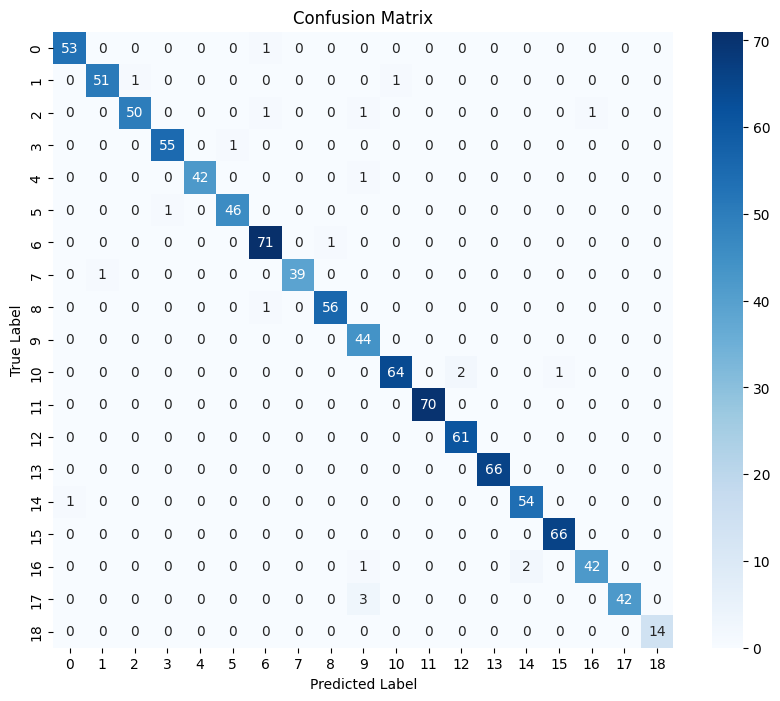

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Get the class to index mapping
class_to_index = {class_name: index for index, class_name in enumerate(label_encoder.classes_)}

# Print the mapping
for class_name, index in class_to_index.items():
    print(f"{class_name}: {index}")

0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
add: 10
dec: 11
div: 12
eq: 13
mul: 14
sub: 15
x: 16
y: 17
z: 18
